In [2]:
import numpy as np


In [3]:
import pandas as pd

In [4]:
#Creating a Series by passing a list of values, letting pandas 
#create a default integer index:
s = pd.Series([1,3,5,np.nan,6,8])


In [6]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
#Creating a DataFrame by
#passing a NumPy array, with a datetime index and labeled columns:
dates= pd.date_range('20130101',periods=6)


In [8]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [10]:
df


,A,B,C,D
2013-01-01,-0.463525,0.052465,-0.088287,-0.184191
2013-01-02,-0.882705,0.075561,-1.027250,2.291670
2013-01-03,-0.172639,0.382298,-0.767171,-0.168935
2013-01-04,-0.410604,1.597345,0.812543,-0.613888
2013-01-05,-0.772243,0.675012,1.757778,0.525592
2013-01-06,-2.584104,0.207793,-0.079387,1.612264


In [7]:
#Creating a DataFrame by passing a dict
#of objects that can be converted to series-like.
df2 = pd.DataFrame({'A': 1.,
                   'B': pd.Timestamp('20130102'),
                      'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                   'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})


In [12]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [13]:
#The columns of the resulting DataFrame have different dtypes.
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [14]:
#Viewing data(tops and bottoms rows of the frame a )
df.head()

,A,B,C,D
2013-01-01,-0.463525,0.052465,-0.088287,-0.184191
2013-01-02,-0.882705,0.075561,-1.027250,2.291670
2013-01-03,-0.172639,0.382298,-0.767171,-0.168935
2013-01-04,-0.410604,1.597345,0.812543,-0.613888
2013-01-05,-0.772243,0.675012,1.757778,0.525592


In [15]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.410604,1.597345,0.812543,-0.613888
2013-01-05,-0.772243,0.675012,1.757778,0.525592
2013-01-06,-2.584104,0.207793,-0.079387,1.612264


In [16]:
#dislay index
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [41]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [42]:
df.to_numpy()

array([[-0.51434132,  1.33143222, -0.03367737, -0.03473725],
       [ 0.00351954, -0.67527422,  0.78706267,  1.24490505],
       [ 0.64865602,  1.94089333, -0.24767969,  1.04859911],
       [-1.01474263, -0.37470656, -0.27459738, -1.53593014],
       [ 1.42285228,  0.28878362,  1.30846048, -0.2702365 ],
       [ 1.34938995, -0.35872268, -0.03636378, -1.42667734]])

In [43]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [44]:
#describe() shows a quick statistic summary of your data:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.315889,0.358734,0.250534,-0.162346
std,0.996159,1.056041,0.647169,1.179825
min,-1.014743,-0.675274,-0.274597,-1.535930
25%,-0.384876,-0.370711,-0.194851,-1.137567
50%,0.326088,-0.034970,-0.035021,-0.152487
75%,1.174206,1.070770,0.581878,0.777765
max,1.422852,1.940893,1.308460,1.244905


In [45]:
#Transposing your data:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.514341,0.003520,0.648656,-1.014743,1.422852,1.349390
B,1.331432,-0.675274,1.940893,-0.374707,0.288784,-0.358723
C,-0.033677,0.787063,-0.247680,-0.274597,1.308460,-0.036364
D,-0.034737,1.244905,1.048599,-1.535930,-0.270237,-1.426677


In [46]:
#Sorting by an axis:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.034737,-0.033677,1.331432,-0.514341
2013-01-02,1.244905,0.787063,-0.675274,0.003520
2013-01-03,1.048599,-0.247680,1.940893,0.648656
2013-01-04,-1.535930,-0.274597,-0.374707,-1.014743
2013-01-05,-0.270237,1.308460,0.288784,1.422852
2013-01-06,-1.426677,-0.036364,-0.358723,1.349390


In [47]:
#Sorting by values:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,0.003520,-0.675274,0.787063,1.244905
2013-01-04,-1.014743,-0.374707,-0.274597,-1.535930
2013-01-06,1.349390,-0.358723,-0.036364,-1.426677
2013-01-05,1.422852,0.288784,1.308460,-0.270237
2013-01-01,-0.514341,1.331432,-0.033677,-0.034737
2013-01-03,0.648656,1.940893,-0.247680,1.048599


In [49]:
#Getting
#Selecting a single column, which yields a Series, equivalent to df.A:
df['A']

2013-01-01   -0.514341
2013-01-02    0.003520
2013-01-03    0.648656
2013-01-04   -1.014743
2013-01-05    1.422852
2013-01-06    1.349390
Freq: D, Name: A, dtype: float64

In [50]:
df[0:3]

,A,B,C,D
2013-01-01,-0.514341,1.331432,-0.033677,-0.034737
2013-01-02,0.003520,-0.675274,0.787063,1.244905
2013-01-03,0.648656,1.940893,-0.247680,1.048599


In [51]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.003520,-0.675274,0.787063,1.244905
2013-01-03,0.648656,1.940893,-0.247680,1.048599
2013-01-04,-1.014743,-0.374707,-0.274597,-1.535930


In [52]:
#For getting a cross section using a label
df.loc[dates[0]]

A   -0.514341
B    1.331432
C   -0.033677
D   -0.034737
Name: 2013-01-01 00:00:00, dtype: float64

In [53]:
#Selecting on a multi-axis by label:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.514341,1.331432
2013-01-02,0.003520,-0.675274
2013-01-03,0.648656,1.940893
2013-01-04,-1.014743,-0.374707
2013-01-05,1.422852,0.288784
2013-01-06,1.349390,-0.358723


In [54]:
#Showing label slicing, both endpoints are included:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,0.003520,-0.675274
2013-01-03,0.648656,1.940893
2013-01-04,-1.014743,-0.374707


In [55]:
#Reduction in the dimensions of the returned object:
df.loc['20130102', ['A', 'B']]

A    0.003520
B   -0.675274
Name: 2013-01-02 00:00:00, dtype: float64

In [58]:
#For getting a scalar value:
#Why do we get different number from each other?
df.loc[dates[0], 'A']

-0.5143413214055269

In [59]:
#For getting fast access to a scalar (equivalent to the prior method):
df.at[dates[0], 'A']


-0.5143413214055269

In [60]:
#Selection by position
#See more in Selection by Position.

#Select via the position of the passed integers:
df.iloc[3]

A   -1.014743
B   -0.374707
C   -0.274597
D   -1.535930
Name: 2013-01-04 00:00:00, dtype: float64

In [61]:
#By integer slices, acting similar to numpy/python:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.014743,-0.374707
2013-01-05,1.422852,0.288784


In [62]:
#By lists of integer position locations, similar to the numpy/python style:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.003520,0.787063
2013-01-03,0.648656,-0.247680
2013-01-05,1.422852,1.308460


In [63]:
#For slicing rows explicitly:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.003520,-0.675274,0.787063,1.244905
2013-01-03,0.648656,1.940893,-0.247680,1.048599


In [64]:
#For getting a value explicitly:
df.iloc[1, 1]

-0.6752742249529705

In [65]:
#For getting fast access to a scalar (equivalent to the prior method):
df.iat[1, 1]


-0.6752742249529705

In [66]:
#Boolean indexing
#Using a single column’s values to select data.
df[df['A'] > 0]

,A,B,C,D
2013-01-02,0.003520,-0.675274,0.787063,1.244905
2013-01-03,0.648656,1.940893,-0.247680,1.048599
2013-01-05,1.422852,0.288784,1.308460,-0.270237
2013-01-06,1.349390,-0.358723,-0.036364,-1.426677


In [68]:
#Selecting values from a DataFrame where a boolean condition is met.
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.331432,NaN,NaN
2013-01-02,0.003520,NaN,0.787063,1.244905
2013-01-03,0.648656,1.940893,NaN,1.048599
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,1.422852,0.288784,1.308460,NaN
2013-01-06,1.349390,NaN,NaN,NaN


In [8]:
#Using the isin() method for filtering:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-1.195465,-0.129469,1.576551,-2.571287,one
2013-01-02,-1.619802,-0.580401,-0.202538,0.469227,one
2013-01-03,-0.160726,-1.180764,0.033143,-0.163889,two
2013-01-04,-0.400063,0.989701,0.154228,0.971272,three
2013-01-05,0.029801,1.802248,-0.030351,-1.850704,four
2013-01-06,-0.224999,0.702329,0.298454,0.149258,three


In [71]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.648656,1.940893,-0.24768,1.048599,two
2013-01-05,1.422852,0.288784,1.30846,-0.270237,four


In [9]:
#Setting
#Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))

In [10]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [74]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [75]:
#Setting values by label:
df.at[dates[0], 'A'] = 0

In [76]:
#Setting values by position:
df.iat[0, 1] = 0

In [77]:
#Setting by assigning with a NumPy array:
df.loc[:, 'D'] = np.array([5] * len(df))

In [78]:
#The result of the prior setting operations.
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.033677,5
2013-01-02,0.003520,-0.675274,0.787063,5
2013-01-03,0.648656,1.940893,-0.247680,5
2013-01-04,-1.014743,-0.374707,-0.274597,5
2013-01-05,1.422852,0.288784,1.308460,5
2013-01-06,1.349390,-0.358723,-0.036364,5


In [82]:
#A where operation with setting.
df2 = df.copy()
df2[df2 > 0] = -df2
df2


,A,B,C,D
2013-01-01,0.000000,0.000000,-0.033677,-5
2013-01-02,-0.003520,-0.675274,-0.787063,-5
2013-01-03,-0.648656,-1.940893,-0.247680,-5
2013-01-04,-1.014743,-0.374707,-0.274597,-5
2013-01-05,-1.422852,-0.288784,-1.308460,-5
2013-01-06,-1.349390,-0.358723,-0.036364,-5


In [11]:
#Missing data
#pandas primarily uses the value np.nan to represent missing data.
#It is by default not included in computations. See the Missing Data section.
#Reindexing allows you to change/add/delete the index on a specified axis. 
#This returns a copy of the data.
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [84]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [85]:
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.033677,5,1.0
2013-01-02,0.003520,-0.675274,0.787063,5,1.0
2013-01-03,0.648656,1.940893,-0.247680,5,NaN
2013-01-04,-1.014743,-0.374707,-0.274597,5,NaN


In [86]:
#To drop any rows that have missing data.
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.00000,0.000000,-0.033677,5,1.0
2013-01-02,0.00352,-0.675274,0.787063,5,1.0


In [87]:
#Filling missing data.
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.033677,5,1.0
2013-01-02,0.003520,-0.675274,0.787063,5,1.0
2013-01-03,0.648656,1.940893,-0.247680,5,5.0
2013-01-04,-1.014743,-0.374707,-0.274597,5,5.0


In [88]:
#To get the boolean mask where values are nan.
pd.isna(df1)


,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


In [89]:
#Operations
#See the Basic section on Binary Ops.

#Stats
#Operations in general exclude missing data.

#Performing a descriptive statistic:
df.mean()

A    0.401613
B    0.136829
C    0.250534
D    5.000000
dtype: float64

In [90]:
#Same operation on the other axis:
df.mean(1)

2013-01-01    1.241581
2013-01-02    1.278827
2013-01-03    1.835467
2013-01-04    0.833988
2013-01-05    2.005024
2013-01-06    1.488576
Freq: D, dtype: float64

In [12]:
#Operating with objects that have different dimensionality and need alignment. In addition, 
#pandas automatically broadcasts along the specified dimension.
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [92]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [93]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.351344,0.940893,-1.247680,4.0
2013-01-04,-4.014743,-3.374707,-3.274597,2.0
2013-01-05,-3.577148,-4.711216,-3.691540,0.0
2013-01-06,NaN,NaN,NaN,NaN


In [94]:
#Apply
#Applying functions to the data:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.033677,5
2013-01-02,0.003520,-0.675274,0.753385,10
2013-01-03,0.652176,1.265619,0.505706,15
2013-01-04,-0.362567,0.890913,0.231108,20
2013-01-05,1.060285,1.179696,1.539569,25
2013-01-06,2.409675,0.820973,1.503205,30


In [95]:
df.apply(lambda x: x.max() - x.min())

A    2.437595
B    2.616168
C    1.583058
D    0.000000
dtype: float64

In [13]:
#Histogramming
#See more at Histogramming and Discretization.
s = pd.Series(np.random.randint(0, 7, size=10))

In [97]:
s

0    3
1    5
2    4
3    4
4    0
5    4
6    0
7    3
8    4
9    3
dtype: int64

In [98]:
s.value_counts()

4    4
3    3
0    2
5    1
dtype: int64

In [99]:
#String Methods
#Series is equipped with a set of string processing methods in the str attribute
#that make it easy to operate on each element of the array, as in the code snippet below.
#Note that pattern-matching in str generally uses regular expressions by default 
#(and in some cases always uses them). See more at Vectorized String Methods.
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [100]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [14]:
#Merge
#Concat
#pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

#See the Merging section.

#Concatenating pandas objects together with concat():
df = pd.DataFrame(np.random.randn(10, 4))

In [102]:
df

,0,1,2,3
0,-1.876859,-0.812548,-1.697027,-1.656202
1,0.505986,0.349590,1.287758,0.145935
2,-0.728366,-0.417569,0.211480,0.141485
3,1.869700,-0.854951,-0.345051,-0.213655
4,-0.838265,0.900775,1.606242,-1.323770
5,0.787905,0.470485,-0.609764,-0.548400
6,0.636917,1.151498,-0.671051,1.007690
7,0.621536,0.231246,-2.041762,0.386291
8,1.056701,0.462838,0.482983,0.771450
9,0.486438,1.207012,-1.035988,0.834476


In [15]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [104]:
pd.concat(pieces)

,0,1,2,3
0,-1.876859,-0.812548,-1.697027,-1.656202
1,0.505986,0.349590,1.287758,0.145935
2,-0.728366,-0.417569,0.211480,0.141485
3,1.869700,-0.854951,-0.345051,-0.213655
4,-0.838265,0.900775,1.606242,-1.323770
5,0.787905,0.470485,-0.609764,-0.548400
6,0.636917,1.151498,-0.671051,1.007690
7,0.621536,0.231246,-2.041762,0.386291
8,1.056701,0.462838,0.482983,0.771450
9,0.486438,1.207012,-1.035988,0.834476


In [106]:
#Join
#SQL style merges. See the Database style joining section.

In [16]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [17]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [109]:
left

,key,lval
0,foo,1
1,foo,2


In [110]:
right

,key,rval
0,foo,4
1,foo,5


In [111]:
 pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [18]:
#Another example that can be given is:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

In [19]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [114]:
left

,key,lval
0,foo,1
1,bar,2


In [115]:
right

,key,rval
0,foo,4
1,bar,5


In [116]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [20]:
#Grouping
#By “group by” we are referring to a process involving one or more of the following steps:

#Splitting the data into groups based on some criteria
#Applying a function to each group independently
#Combining the results into a data structure

df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
              'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                 'D': np.random.randn(8)})

In [21]:
df

,A,B,C,D
0,foo,one,0.596993,-0.090046
1,bar,one,-0.991023,1.102361
2,foo,two,-0.578712,-0.510045
3,bar,three,-0.689840,-2.061086
4,foo,two,1.029581,0.063615
5,bar,two,1.916534,0.403231
6,foo,one,1.293743,-0.287605
7,foo,three,0.630269,-0.678751


In [124]:
#Grouping and then applying the sum() function to the resulting groups
df.groupby('A').sum()

,C,D
A,,
bar,-1.794832,0.110386
foo,0.075714,-1.333608


In [125]:
#Grouping by multiple columns forms a hierarchical index,
#and again we can apply the sum function.
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.275389 -1.020147
    three -1.015175 -0.238725
    two   -2.055046  1.369259
foo one   -0.953714 -0.803206
    three -0.595194 -0.106123
    two    1.624623 -0.424279

In [22]:
#Reshaping
#See the sections on Hierarchical Indexing and Reshaping.
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.813069  0.721982
      two     0.371731  0.049691
baz   one    -0.431344 -1.484156
      two     0.079493 -0.200113

In [24]:
#The stack() method “compresses” a level in the DataFrame’s columns.
stacked = df2.stack()

In [25]:
stacked

first  second   
bar    one     A    0.813069
               B    0.721982
       two     A    0.371731
               B    0.049691
baz    one     A   -0.431344
               B   -1.484156
       two     A    0.079493
               B   -0.200113
dtype: float64

In [134]:
#With a “stacked” DataFrame or Series (having a MultiIndex as the index), 
#the inverse operation of stack() is unstack(),
#which by default unstacks the last level:

In [135]:
stacked.unstack()

A         B
first second                    
bar   one     0.206709  2.512689
      two    -1.313732 -0.531372
baz   one    -1.056058  0.020279
      two    -0.011991  1.090752

In [136]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.206709 -1.313732
      B  2.512689 -0.531372
baz   A -1.056058 -0.011991
      B  0.020279  1.090752

In [137]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.206709 -1.056058
       B  2.512689  0.020279
two    A -1.313732 -0.011991
       B -0.531372  1.090752

In [139]:
#Pivot tables
#See the section on Pivot Tables.

df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                    'B': ['A', 'B', 'C'] * 4,
                     'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                     'D': np.random.randn(12),
                     'E': np.random.randn(12)})

In [140]:
df

,A,B,C,D,E
0,one,A,foo,-0.255615,0.297673
1,one,B,foo,-1.550061,0.236398
2,two,C,foo,0.989462,0.126172
3,three,A,bar,-0.299623,-0.686713
4,one,B,bar,1.689593,-0.190809
5,one,C,bar,1.922792,-1.444786
6,two,A,foo,0.122827,-0.497492
7,three,B,foo,-0.582773,-0.301908
8,one,C,foo,1.794826,0.227043
9,one,A,bar,1.315602,-0.089116


In [141]:
#We can produce pivot tables from this data very easily:

In [142]:
 pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.315602 -0.255615
      B  1.689593 -1.550061
      C  1.922792  1.794826
three A -0.299623       NaN
      B       NaN -0.582773
      C  1.953374       NaN
two   A       NaN  0.122827
      B -1.687019       NaN
      C       NaN  0.989462

In [143]:
#Time series
#Pandas has simple, powerful, and efficient functionality for performing 
#resampling operations during frequency conversion
#(e.g., converting secondly data into 5-minutely data).
#This is extremely common in, but not limited to, financial applications.
#See the Time Series section below
#https://pandas.pydata.org/pandas-docs/version/1.0.0/user_guide/timeseries.html#timeseries

In [26]:

rng = pd.date_range('1/1/2012', periods=100, freq='S')


In [27]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [19]:
ts.resample('5Min').sum()

2012-01-01    24040
Freq: 5T, dtype: int64

In [28]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [29]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [22]:
ts

2012-03-06    2.099297
2012-03-07   -0.485317
2012-03-08    1.883479
2012-03-09    1.114653
2012-03-10    0.190724
Freq: D, dtype: float64

In [30]:
ts_utc = ts.tz_localize('UTC')

In [157]:
ts_utc

2012-03-06 00:00:00+00:00    0.077437
2012-03-07 00:00:00+00:00   -0.976870
2012-03-08 00:00:00+00:00   -0.587048
2012-03-09 00:00:00+00:00   -1.917675
2012-03-10 00:00:00+00:00   -0.634980
Freq: D, dtype: float64

In [158]:
#Converting to another time zone:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.077437
2012-03-06 19:00:00-05:00   -0.976870
2012-03-07 19:00:00-05:00   -0.587048
2012-03-08 19:00:00-05:00   -1.917675
2012-03-09 19:00:00-05:00   -0.634980
Freq: D, dtype: float64

In [31]:
#Converting between time span representations:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [32]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [161]:
ts

2012-01-31   -0.280567
2012-02-29    0.482889
2012-03-31   -1.947863
2012-04-30   -1.965587
2012-05-31   -0.681982
Freq: M, dtype: float64

In [33]:
ps = ts.to_period()

In [163]:
ps.to_timestamp()

2012-01-01   -0.280567
2012-02-01    0.482889
2012-03-01   -1.947863
2012-04-01   -1.965587
2012-05-01   -0.681982
Freq: MS, dtype: float64

In [34]:
#Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in
#November to 9am of the end of the month following the quarter end:

prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()


1990-03-01 09:00    0.512115
1990-06-01 09:00    0.221396
1990-09-01 09:00   -2.613297
1990-12-01 09:00    0.368232
1991-03-01 09:00    0.402842
Freq: H, dtype: float64

In [35]:
#Categoricals
#pandas can include categorical data in a DataFrame. 
#For full docs, see the categorical introduction and the API documentation.

df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
                   

In [36]:
#Convert the raw grades to a categorical data type.

df["grade"] = df["raw_grade"].astype("category")


In [37]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [169]:
#Rename the categories to more meaningful names
#(assigning to Series.cat.categories is inplace!).


In [38]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [39]:
#Reorder the categories and simultaneously add the missing categories
#(methods under Series .cat return a new Series by default).
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])

In [40]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [173]:
#Sorting is per order in the categories, not lexical order.


In [174]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [175]:
#Grouping by a categorical column also shows empty categories.
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [176]:
#Plotting
#See the Plotting docs.

#We use the standard convention for referencing the matplotlib API:

In [41]:
import matplotlib.pyplot as plt
plt.close('all')

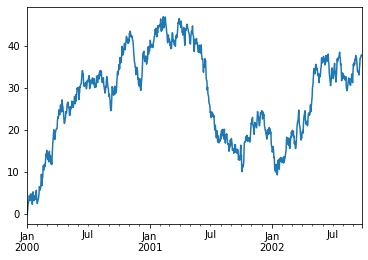

In [42]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

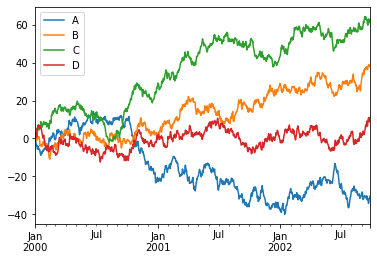

In [43]:
#On a DataFrame, the plot() method is a convenience to plot all 
#of the columns with labels:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

In [31]:
#Getting data in/out
#CSV
#Writing to a csv file.

In [38]:
#Writing to a csv file.
df.to_csv('foo.csv')

In [39]:
#Reading from a csv file.
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.249558,-2.771603,-0.340225,0.760956
1,2000-01-02,-0.103984,-3.068661,0.079738,-1.604635
2,2000-01-03,0.507771,-3.066852,0.026495,-0.799098
3,2000-01-04,1.622057,-4.560168,-0.833937,-0.459373
4,2000-01-05,1.681394,-4.981578,-2.294804,0.055867
...,...,...,...,...,...
995,2002-09-22,16.222260,-4.255719,3.332667,33.496021
996,2002-09-23,17.317443,-3.447389,3.748014,32.752704
997,2002-09-24,16.658673,-3.190886,4.578826,33.716674
998,2002-09-25,17.325765,-4.138180,4.093881,33.802955


In [ ]:
#HDF5
#Reading and writing to HDFStores.

In [40]:
df.to_csv('foo.csv')

In [41]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.249558,-2.771603,-0.340225,0.760956
1,2000-01-02,-0.103984,-3.068661,0.079738,-1.604635
2,2000-01-03,0.507771,-3.066852,0.026495,-0.799098
3,2000-01-04,1.622057,-4.560168,-0.833937,-0.459373
4,2000-01-05,1.681394,-4.981578,-2.294804,0.055867
...,...,...,...,...,...
995,2002-09-22,16.222260,-4.255719,3.332667,33.496021
996,2002-09-23,17.317443,-3.447389,3.748014,32.752704
997,2002-09-24,16.658673,-3.190886,4.578826,33.716674
998,2002-09-25,17.325765,-4.138180,4.093881,33.802955


In [42]:
#HDF5
#Reading and writing to HDFStores.

#Writing to a HDF5 Store.

In [43]:
df.to_hdf('foo.h5', 'df')

In [44]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,0.249558,-2.771603,-0.340225,0.760956
2000-01-02,-0.103984,-3.068661,0.079738,-1.604635
2000-01-03,0.507771,-3.066852,0.026495,-0.799098
2000-01-04,1.622057,-4.560168,-0.833937,-0.459373
2000-01-05,1.681394,-4.981578,-2.294804,0.055867
...,...,...,...,...
2002-09-22,16.222260,-4.255719,3.332667,33.496021
2002-09-23,17.317443,-3.447389,3.748014,32.752704
2002-09-24,16.658673,-3.190886,4.578826,33.716674
2002-09-25,17.325765,-4.138180,4.093881,33.802955


In [45]:
#Excel
#Reading and writing to MS Excel.

#Writing to an excel file.

In [47]:
#Need to do a conda install before the next step
#df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [48]:
conda install openpyxl

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - openpyxl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    et_xmlfile-1.0.1           |          py_1001          11 KB  conda-forge
    jdcal-1.4.1                |             py_0           9 KB  conda-forge
    openpyxl-3.0.4             |             py_0         152 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following NEW packages will be INSTALLED:

  et_xmlfile         conda-forge/noarch::et_xmlfile-1.0.1-py_1001
  jdcal              conda-forge/noarch::jdcal-1.4.1-py_0
  openpyxl           conda-forge/noarch::openpyxl-3.0.4-py_0

The following packages will be UPDATED:

  openssl     

In [44]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [45]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.946892,0.461821,0.722198,0.646483
1,2000-01-02,-1.798390,-0.165947,2.540325,1.386191
2,2000-01-03,-2.283926,-0.056983,3.108616,0.315424
3,2000-01-04,-3.890090,0.279306,3.255934,0.978486
4,2000-01-05,-3.656061,-1.280073,2.709280,3.164099
...,...,...,...,...,...
995,2002-09-22,-33.827961,39.045677,62.065453,11.025709
996,2002-09-23,-32.033443,38.455247,61.102837,10.611783
997,2002-09-24,-31.617991,37.964252,62.096520,8.688727
998,2002-09-25,-30.985603,38.059631,62.533436,9.189615


In [59]:
#Gotchas
#If you are attempting to perform an operation you might see an exception like:
if pd.Series([False, True, False]):
     print()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().